In [13]:
# load BostonHousing dataset from "mlbench" package
# https://cran.r-project.org/web/packages/mlbench/index.html
Boston = read.csv("/Users/evanmuzzall/Desktop/sage/BostonHousing.csv")

# view first 10 rows of dataset
head(Boston, n=10)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [14]:
# recode "dis" as factor/categorical variable
Boston$dis = cut(Boston$dis, 
                 breaks=c(0, 3, 6, 13),
                 levels=c(1,2,3),
                 labels=c("short", "medium", "long"))

In [15]:
# check that dis is now a factor/categorical variable
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : Factor w/ 3 levels "short","medium",..: 2 2 2 3 3 3 2 2 3 3 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [16]:
# summarize data
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age             dis     
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   short :240  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   medium:179  
 Median :0.5380   Median :6.208   Median : 77.50   long  : 87  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57               
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08               
 Max.   :0.8710   Max.   :8.780   Max.   :100.00               
      rad              tax           ptratio           

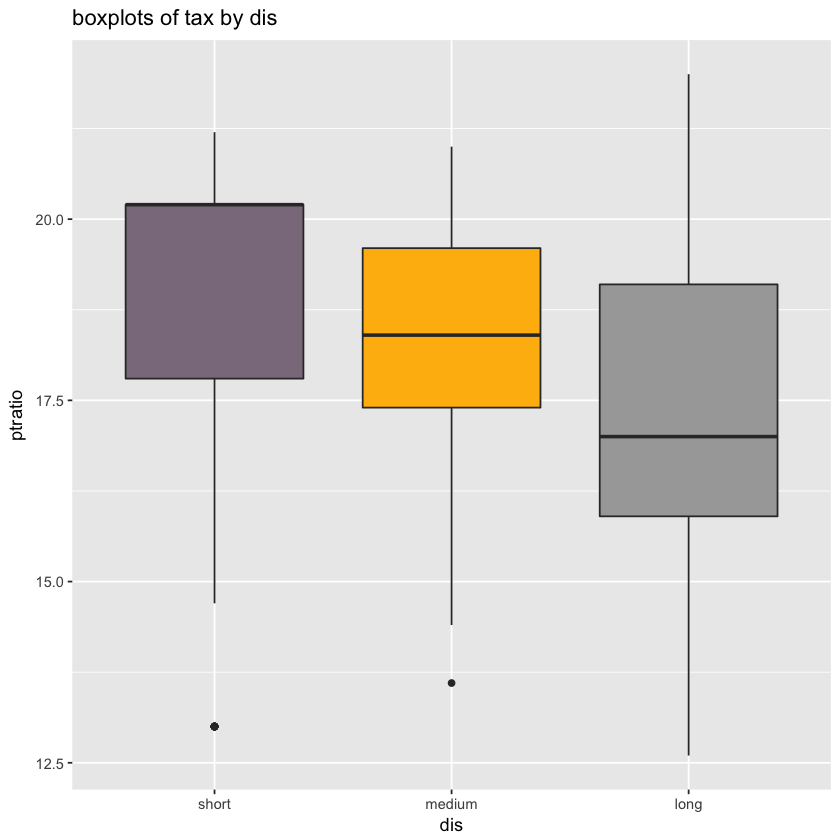

In [17]:
# boxplot of tax
library(ggplot2)
ggplot(Boston, aes(x=dis, y=ptratio)) + 
    geom_boxplot(fill=sample(colors(), 3, replace=FALSE)) + 
    ggtitle("boxplots of tax by dis")

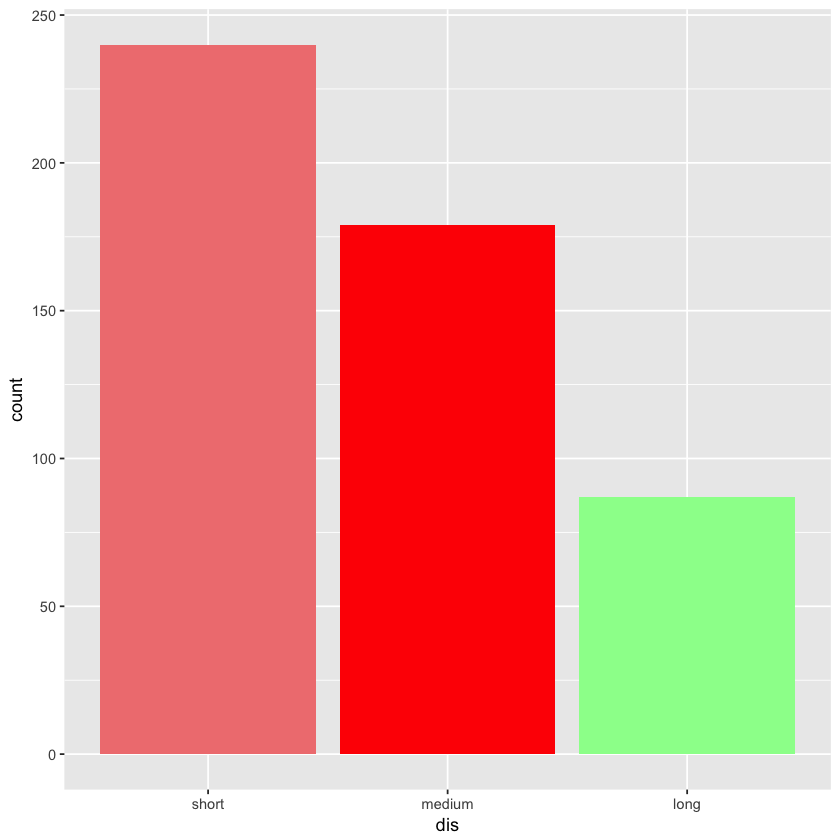

In [18]:
# barplots of dis
ggplot(Boston, aes(dis)) + geom_bar(fill=sample(colors(), 3, replace=FALSE))

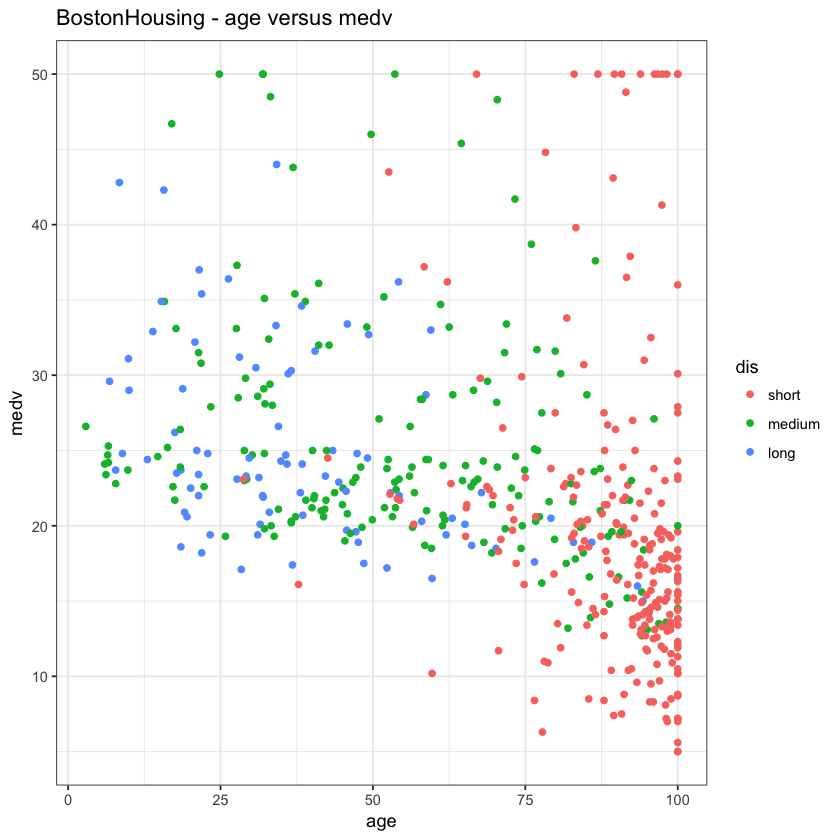

In [19]:
# scatterplot of age (proportion of homes built before 1940) and medv (median value of homes in 1000s of dollars)
library(ggplot2)
ggplot(Boston, aes(x=age, y=medv, col=dis)) + 
    geom_point() +
    ggtitle("BostonHousing - age versus medv") + 
    theme_bw()